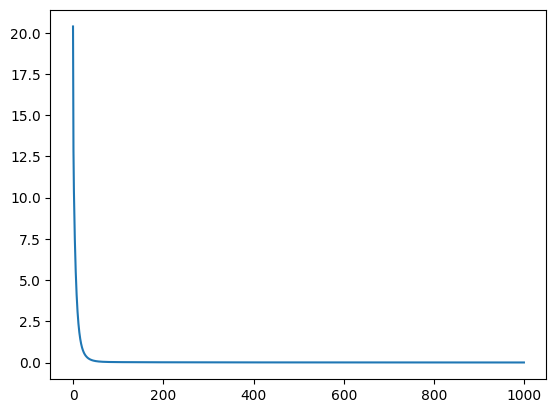

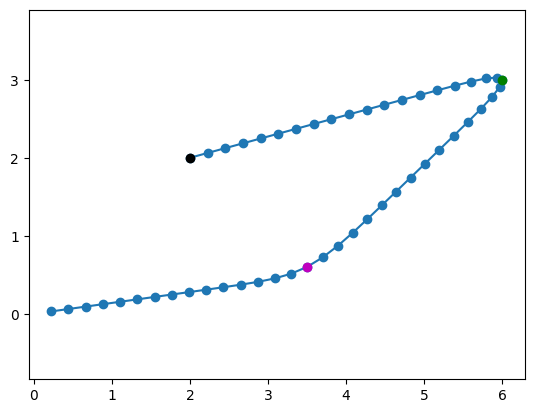

In [ ]:

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit
from functools import partial


def compute_cost(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2):
  v_x = v[0: n]
  v_y = v[n:2*n]

  x = x_init+jnp.cumsum(v_x*delta_t)
  y = y_init+jnp.cumsum(v_y*delta_t)

  c_g = (x[-1]-x_f)**2+(y[-1]-y_f)**2
  c_via = (x[m_1]-x_1)**2+(y[m_1]-y_1)**2+(x[m_2]-x_2)**2+(y[m_2]-y_2)**2
  c_s = jnp.sum(jnp.diff(v_x)**2)+jnp.sum(jnp.diff(v_y)**2)

  c = c_g+c_via+0.01*c_s

  return c

x_init = 0.0
y_init = 0.0
x_f = 2.0
y_f = 2.0

delta_t = 0.2


# v_x = jnp.hstack(( 0.1, 0.2, 0.5  ))
# v_y = jnp.hstack(( 0.2, 0.2, -0.3  ))
# num = jnp.shape(v_x)[0]

# v = jnp.hstack(( v_x, v_y ))

n = 50
v = jnp.zeros(2*n)

grad_func = grad(compute_cost, argnums = (0))
cost_jit = compute_cost

eta = 0.1

maxiter = 1000

x_1 = 3.5
y_1 = 0.6

x_2 = 6.0
y_2 = 3.0

cost_track = []

m_1 = 15
m_2 = 30



for i in range(0, maxiter):
  grad_vec = grad_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2)
  v = v-eta*grad_vec
  cost = cost_jit(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2)
  cost_track.append(cost)

v_x = v[0: n]
v_y = v[n:2*n]

x = x_init+jnp.cumsum(v_x*delta_t)
y = y_init+jnp.cumsum(v_y*delta_t)


plt.figure(1)
plt.plot(cost_track)

plt.show()

plt.figure(1)
plt.plot(x, y, 'o-')
plt.plot(x_1, y_1, 'om')
plt.plot(x_2, y_2, 'og')
plt.plot(x_f, y_f, 'ok')

plt.axis('equal')
plt.show()


[ 0.96910185  0.969436    0.97075844  0.9749832   0.98629063  1.012009
  1.0618982   1.1428944   1.24811     1.3490644   1.4043984   1.3823144
  1.2802546   1.126828    0.9636983   0.8409835   0.9435917   0.8961059
  0.85994864  0.8441442   0.8403742   0.8420808   0.845101    0.8472675
  0.8476587   0.8459591   0.8420642   0.8354782   0.8206411   0.75388825
  0.42153502 -0.556077   -0.8900444  -0.9602072  -0.9804315  -0.9945016
 -1.0080346  -1.0215186  -1.0349423  -1.0482537  -1.061397   -1.0743176
 -1.0869648  -1.099321   -1.1115378  -1.1245093  -1.1415403  -1.1708883
 -1.2233714  -1.2894566 ]


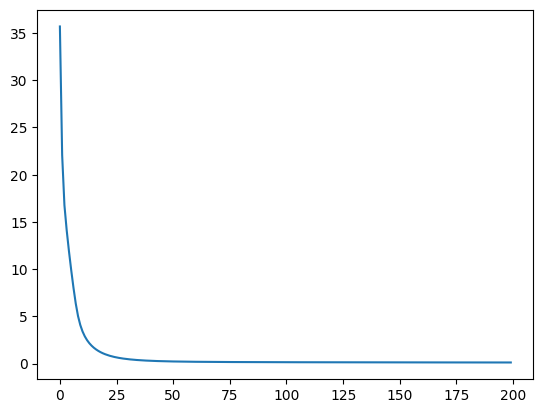

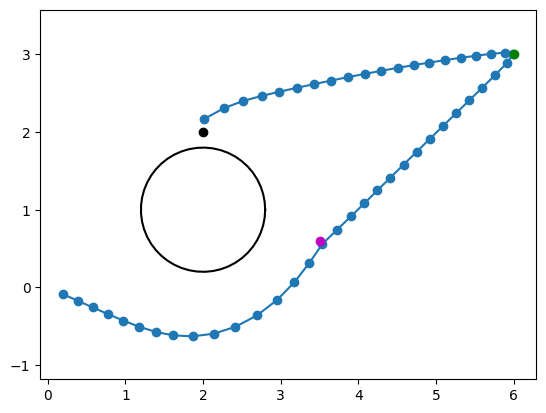

In [ ]:

import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit
from functools import partial


def compute_cost(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta):
  v_x = v[0: n]
  v_y = v[n:2*n]

  x = x_init+jnp.cumsum(v_x*delta_t)
  y = y_init+jnp.cumsum(v_y*delta_t)

  c_g = (x[-1]-x_f)**2+(y[-1]-y_f)**2
  c_via = (x[m_1]-x_1)**2+(y[m_1]-y_1)**2+(x[m_2]-x_2)**2+(y[m_2]-y_2)**2
  c_s = jnp.sum(jnp.diff(v_x)**2)+jnp.sum(jnp.diff(v_y)**2)

  f_obs = (x-x_obs)**2+(y-y_obs)**2-r_obs**2
  c_obs = jnp.sum(jnp.log(1+jnp.exp(-beta*f_obs))/beta)

  c = c_g+c_via+0.01*c_s+c_obs

  return c

x_init = 0.0
y_init = 0.0
x_f = 2.0
y_f = 2.0

delta_t = 0.2


# v_x = jnp.hstack(( 0.1, 0.2, 0.5  ))
# v_y = jnp.hstack(( 0.2, 0.2, -0.3  ))
# num = jnp.shape(v_x)[0]

# v = jnp.hstack(( v_x, v_y ))

n = 50
v = jnp.zeros(2*n)

grad_func = grad(compute_cost, argnums = (0))
# cost_jit = compute_cost

eta = 0.1

maxiter = 200

x_1 = 3.5
y_1 = 0.6

x_2 = 6.0
y_2 = 3.0

cost_track = []

m_1 = 15
m_2 = 30

x_obs = 2.0
y_obs = 1.0
r_obs = 0.8
beta = 3.0

for i in range(0, maxiter):
  grad_vec = grad_func(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta)
  v = v-eta*grad_vec
  cost = compute_cost(v, delta_t, n, m_1, m_2, x_init, y_init, x_f, y_f, x_1, y_1, x_2, y_2, x_obs, y_obs, r_obs, beta)
  cost_track.append(cost)

v_x = v[0: n]
v_y = v[n:2*n]

x = x_init+jnp.cumsum(v_x*delta_t)
y = y_init+jnp.cumsum(v_y*delta_t)

th = jnp.linspace(0, jnp.pi*2, 50)
x_circ = x_obs+r_obs*jnp.cos(th)
y_circ = y_obs+r_obs*jnp.sin(th)


print(v_x)

plt.figure(1)
plt.plot(cost_track)

plt.show()

plt.figure(1)
plt.plot(x, y, 'o-')
plt.plot(x_1, y_1, 'om')
plt.plot(x_2, y_2, 'og')
plt.plot(x_f, y_f, 'ok')
plt.plot(x_circ, y_circ, '-k')

plt.axis('equal')
plt.show()
